<IPython.core.display.Javascript object>


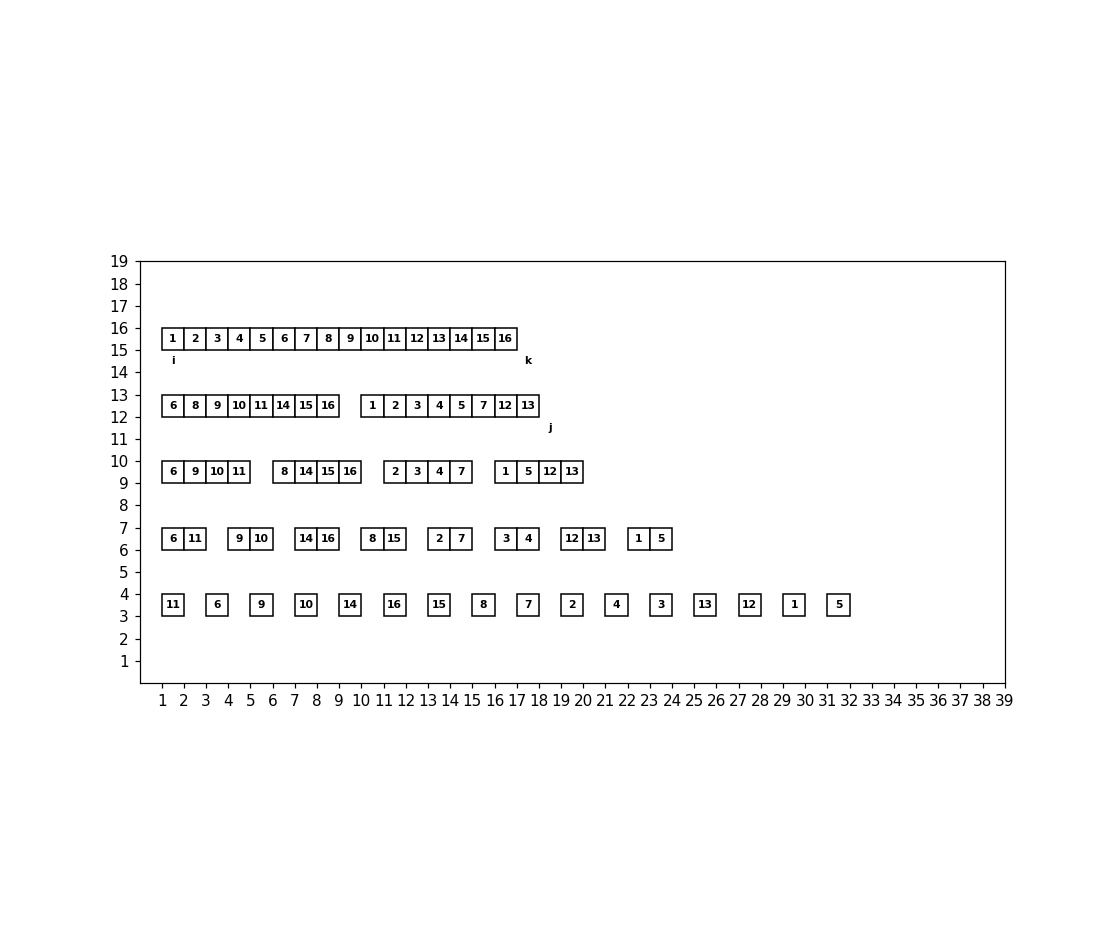

VBox()

init


IndexError: list index out of range

IndexError: list index out of range

IndexError: list index out of range

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import PathPatch
from matplotlib.patches import Path
from matplotlib.transforms import Bbox
import random 
%matplotlib nbagg 

class partir_arreglo: 
    def __init__(self,arr): 
        info = self.dibujar_arreglo(arr,1,current_y)
        niveles.append([(arr,info)])
    #tenemos que saber donde esta el ultimo nivel 
    #la forma de los niveles es i con el arreglo y luego en el segundo esta la información 
    #que es el rectángulo y la anotación
    def dibujar_arreglo(self,arr,x,y):
        info = [[] for i in range(0,len(arr))]
        for i in range(0,len(arr)): 
            r = Rectangle((x, y), width, height,edgecolor = 'black',facecolor = 'white')
            ax.add_patch(r)
            rx, ry = r.get_xy()
            cx = rx + r.get_width()/2.0
            cy = ry + r.get_height()/2.0
            anot = ax.annotate(str(arr[i]), (cx, cy), color='black', weight='bold', fontsize=7, ha='center', va='center')
            info[i] = [r,anot]
            x = x + width
        
        return info
    
    def next_button_handler(self,event):  
        global current_y 
        x = 1
        nuevo_nivel = []
        for (a,_) in niveles[len(niveles)-1]: 
            a1 = [a[i] for i in range(0,len(a)//2)] 
            a2  = [a[i] for i in range(len(a)//2,len(a))] 
            inf1 = self.dibujar_arreglo(a1,x,current_y - 3*width)
            x = x +((len(a1)+1)*width)
            inf2 = self.dibujar_arreglo(a2,x,current_y - 3*width)
            x = x +((len(a1)+1)*width)
            nuevo_nivel.append((a1,inf1))
            nuevo_nivel.append((a2,inf2))
        niveles.append(nuevo_nivel) 
        current_y = current_y - 3*height 
        if(2**(len(niveles) -1)== len(complete_array)):
            estado = merge()
            estado.main()
        #actualizar posicion de nivel

    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
    
class merge:
    #tengo que decir el nivel y los dos que voy a juntar
    lev = len(niveles)-1; 
    ind = 0 
    i_ind = 0 
    j_ind = 0
    k_ind = 0 
    k_anot = None 
    i_anot = None
    j_anot = None
    def __init__(self): 
        #todos los niveles ponlos en 0 
        for i in range(0,len(niveles)-1): 
            for (a,inf) in niveles[i]:
                for j in range(0,len(inf)): 
                    inf[j][1].set(text = "")
        self.mover_i_anot(self.lev,self.ind,self.j_ind)
        self.mover_j_anot(self.lev,self.ind+1,self.j_ind)
        self.mover_k_anot(self.lev-1,self.ind//2,self.k_ind)
        print("init")
        
   
    def len_arr(self,lev,i): 
        return len(niveles[lev][i][0])
    def mover_i_anot(self,lev,i,j): 
        #si no hay anotacion crea un dummy 
        if(self.i_anot == None): 
            self.i_anot = ax.annotate("i", (1, 1), color='black', weight='bold', fontsize=7, ha='center', va='center')
        if(j < self.len_arr(lev,i)):
            r = niveles[lev][i][1][j][0]
            x,y = r.get_xy()
            h = r.get_height()
            w = r.get_width()
            self.i_anot.set(x = x + w/2)
            self.i_anot.set(y = y - h/2)
        else: 
            r = niveles[lev][i][1][self.len_arr(lev,i)-1][0]
            x,y = r.get_xy()
            h = r.get_height()
            w = r.get_width()
            self.i_anot.set(x = x + w + w/2)
            self.i_anot.set(y = y - h/2)
            
    def mover_j_anot(self,lev,i,j): 
        if(self.j_anot == None): 
            self.j_anot = ax.annotate("j", (1, 1), color='black', weight='bold', fontsize=7, ha='center', va='center')
        if(j < self.len_arr(lev,i)): 
            r = niveles[lev][i][1][j][0]
            x,y = r.get_xy()
            h = r.get_height()
            w = r.get_width()
            self.j_anot.set(x = x + w/2)
            self.j_anot.set(y = y - h/2)
        else: 
            r = niveles[lev][i][1][self.len_arr(lev,i)-1][0]
            x,y = r.get_xy()
            h = r.get_height()
            w = r.get_width()
            self.j_anot.set(x = x + w + w/2)
            self.j_anot.set(y = y - h/2)
    def mover_k_anot(self,lev,i,j):
        if(self.k_anot == None): 
            self.k_anot = ax.annotate("k", (1, 1), color='black', weight='bold', fontsize=7, ha='center', va='center')
        if(j < self.len_arr(lev,i)): 
            r = niveles[lev][i][1][j][0]
            x,y = r.get_xy()
            h = r.get_height()
            w = r.get_width()
            self.k_anot.set(x = x + w/2)
            self.k_anot.set(y = y - h/2)
        else: 
            r = niveles[lev][i][1][self.len_arr(lev,i)-1][0]
            x,y = r.get_xy()
            h = r.get_height()
            w = r.get_width()
            self.k_anot.set(x = x + w + w/2)
            self.k_anot.set(y = y - h/2)
        
    def next_button_handler(self,event):  
        #esta accediendo al 0 porque es donde está el arreglo 
        if(len(niveles[self.lev][self.ind][0]) == self.i_ind and len(niveles[self.lev][self.ind+1][0]) == self.j_ind ): 
            #si ya llego al final 
            self.ind = self.ind + 2 
            self.j_ind = 0 
            self.i_ind = 0 
            self.k_ind = 0 
            if(self.ind == len(niveles[self.lev])): 
                self.lev = self.lev - 1 
                self.ind = 0 
            #entonces el indice cambialo en 2 
            #si ya llego al fina entonces disminuye el nivel 
            self.mover_i_anot(self.lev,self.ind,self.j_ind)
            self.mover_j_anot(self.lev,self.ind+1,self.j_ind)
            self.mover_k_anot(self.lev-1,self.ind//2,self.k_ind)
            return 

        if(len(niveles[self.lev][self.ind][0]) == self.i_ind): 
            niveles[self.lev-1][self.ind//2][0][self.k_ind] = niveles[self.lev][self.ind+1][0][self.j_ind]
            niveles[self.lev-1][self.ind//2][1][self.k_ind][1].set(text = str(niveles[self.lev][self.ind+1][0][self.j_ind]))
            self.j_ind = self.j_ind + 1
            self.k_ind = self.k_ind + 1
            #este es el cuadrado donde esta 
            self.mover_j_anot(self.lev,self.ind+1,self.j_ind)
            self.mover_k_anot(self.lev-1,self.ind//2,self.k_ind)
            return
            
        if(len(niveles[self.lev][self.ind+1][0]) == self.j_ind): 
            niveles[self.lev-1][self.ind//2][0][self.k_ind] = niveles[self.lev][self.ind][0][self.i_ind]
            niveles[self.lev-1][self.ind//2][1][self.k_ind][1].set(text = str(niveles[self.lev][self.ind][0][self.i_ind]))
            self.i_ind = self.i_ind + 1
            self.k_ind = self.k_ind + 1
            self.mover_i_anot(self.lev,self.ind,self.i_ind)
            self.mover_k_anot(self.lev-1,self.ind//2,self.k_ind)
            return 
        if(niveles[self.lev][self.ind][0][self.i_ind] < niveles[self.lev][self.ind+1][0][self.j_ind]): 
            niveles[self.lev-1][self.ind//2][0][self.k_ind] = niveles[self.lev][self.ind][0][self.i_ind]
            niveles[self.lev-1][self.ind//2][1][self.k_ind][1].set(text = str(niveles[self.lev][self.ind][0][self.i_ind]))
            self.i_ind = self.i_ind + 1 
            self.k_ind = self.k_ind + 1 
            self.mover_i_anot(self.lev,self.ind,self.i_ind)
            self.mover_k_anot(self.lev-1,self.ind//2,self.k_ind)
        else: 
            niveles[self.lev-1][self.ind//2][0][self.k_ind] = niveles[self.lev][self.ind+1][0][self.j_ind]
            #accede a 1 y luego 1 porque en 1 esta la informacion y en 1 esta la anotación 
            niveles[self.lev-1][self.ind//2][1][self.k_ind][1].set(text = str(niveles[self.lev][self.ind+1][0][self.j_ind]))
            self.j_ind = self.j_ind + 1
            self.k_ind = self.k_ind + 1
            self.mover_j_anot(self.lev,self.ind+1,self.j_ind)
            self.mover_k_anot(self.lev-1,self.ind//2,self.k_ind)
        

    def main(self):
        next_button = widgets.Button(description='siguiente')
        controles.children = [next_button]
        next_button.on_click(self.next_button_handler)
    
fig, ax = plt.subplots()
maxim_x = 40
maxim_y = 20
plt.xticks(range(1,maxim_x))
plt.yticks(range(1,maxim_y))
plt.gca().set_aspect('equal', adjustable='box')
controles = widgets.VBox([])
display(controles)       
niveles = []
current_y = 15
height = 1
width = 1
complete_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
random.shuffle(complete_array)
estado = partir_arreglo(complete_array)
estado.main()
